In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('apple_quality.csv')
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


In [6]:
data.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [7]:
def clean(df):
    df['Quality'] = df['Quality'].replace({'good': 1, 'bad': 0})

    df = df.dropna()
    df.drop(df[df['Acidity'] == 'Created_by_Nidula_Elgiriyewithana'].index, inplace = True)
    df.drop('A_id', axis=1, inplace=True)

    df['Acidity'] = df['Acidity'].astype(float)
    df['Quality'] = df['Quality'].astype(int)

    return df

data = clean(data)

In [8]:
data.corrwith(data['Quality']).abs().sort_values(ascending=False)

Quality        1.000000
Ripeness       0.264315
Juiciness      0.260223
Sweetness      0.250998
Size           0.244007
Crunchiness    0.012376
Acidity        0.007697
Weight         0.001421
dtype: float64

In [9]:

corr_matrix = data.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,0.170702,0.324680,0.169868,0.018892,0.134773,0.196218,0.244007
Weight,0.170702,1.000000,0.154246,0.095882,0.092263,0.243824,0.016414,0.001421
Sweetness,0.324680,0.154246,1.000000,0.037552,0.095882,0.273800,0.085999,0.250998
Crunchiness,0.169868,0.095882,0.037552,1.000000,0.259607,0.201982,0.069943,0.012376
Juiciness,0.018892,0.092263,0.095882,0.259607,1.000000,0.097144,0.248714,0.260223
Ripeness,0.134773,0.243824,0.273800,0.201982,0.097144,1.000000,0.202669,0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,0.202669,1.000000,0.007697
Quality,0.244007,0.001421,0.250998,0.012376,0.260223,0.264315,0.007697,1.000000


In [10]:
X = data.drop(['Quality'], axis=1)
y = data['Quality']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = MLPClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model accuracy:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       401
           1       0.95      0.93      0.94       399

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800

Model accuracy: 0.93875


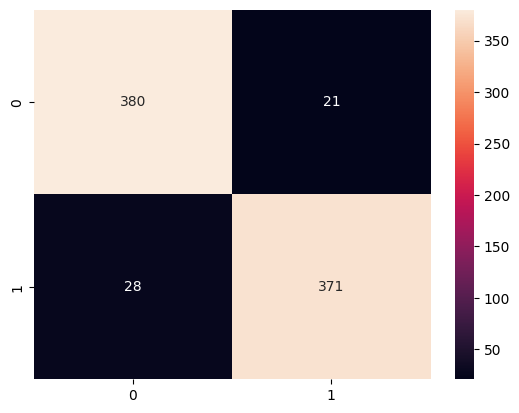

In [13]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

In [14]:
print("Model accuracy: ", "{:.2f}%".format(100* accuracy_score(y_test,y_pred)))

Model accuracy:  93.88%
